# Класс Tensor

In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Определение входного тензора в граф
x = tf.placeholder(dtype=tf.float32, shape=(2, 1), name='input')
# Определение графа вычислений
w = tf.Variable(initial_value=[[1, 1], [1, 1]], dtype=tf.float32, shape=(2, 2), 
                name='weights', use_resource=True)
b = tf.constant(value=[[1], [1]], dtype=tf.float32, shape=(2, 1), name='bias')
y = tf.add(tf.matmul(w, x), b, name='output')
print(y)
# Использование tf.Session() для вычислений
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputs = sess.run([y],  feed_dict={x: [[-3], [8]]})
    print(outputs)
    sess.run(w.assign([[-1, -1], [-1, -1]]))
    outputs = sess.run([y],  feed_dict={x: [[-3], [8]]})
    print(outputs)

Tensor("output:0", shape=(2, 1), dtype=float32)
[array([[6.],
       [6.]], dtype=float32)]
[array([[-4.],
       [-4.]], dtype=float32)]


# Нейронная сеть

In [ ]:
import pandas as pd
import urllib.request as request
import matplotlib.pyplot as plt

# Download dataset
IRIS_TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"
IRIS_TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
train = pd.read_csv(IRIS_TRAIN_URL, names=names, skiprows=1)
test = pd.read_csv(IRIS_TEST_URL, names=names, skiprows=1)

# Train and test input data
Xtrain = train.drop("species", axis=1)
Xtest = test.drop("species", axis=1)

# Encode target values into binary ('one-hot' style) representation
ytrain = pd.get_dummies(train.species)
ytest = pd.get_dummies(test.species)

In [ ]:
def create_train_model(hidden_nodes, num_iters):
    
    # Reset the graph
    tf.reset_default_graph()

    # Placeholders for input and output data
    X = tf.placeholder(shape=(120, 4), dtype=tf.float64, name='X')
    y = tf.placeholder(shape=(120, 3), dtype=tf.float64, name='y')

    # Variables for two group of weights between the three layers of the network
    W1 = tf.Variable(np.random.rand(4, hidden_nodes), dtype=tf.float64)
    W2 = tf.Variable(np.random.rand(hidden_nodes, 3), dtype=tf.float64)

    # Create the neural net graph
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Define a loss function
    deltas = tf.square(y_est - y)
    loss = tf.reduce_sum(deltas)

    # Define a train operation to minimize the loss
    optimizer = tf.train.GradientDescentOptimizer(0.005)
    train = optimizer.minimize(loss)

    # Initialize variables and run session
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    # Go through num_iters iterations
    for i in range(num_iters):
        sess.run(train, feed_dict={X: Xtrain, y: ytrain})
        loss_plot[hidden_nodes].append(sess.run(loss, feed_dict={X: Xtrain.values, y: ytrain.values}))
        weights1 = sess.run(W1)
        weights2 = sess.run(W2)
        
    print("loss (hidden nodes: %d, iterations: %d): %.2f" % (hidden_nodes, num_iters, loss_plot[hidden_nodes][-1]))
    sess.close()
    return weights1, weights2

loss (hidden nodes: 5, iterations: 2000): 5.91
loss (hidden nodes: 10, iterations: 2000): 5.92
loss (hidden nodes: 20, iterations: 2000): 6.97


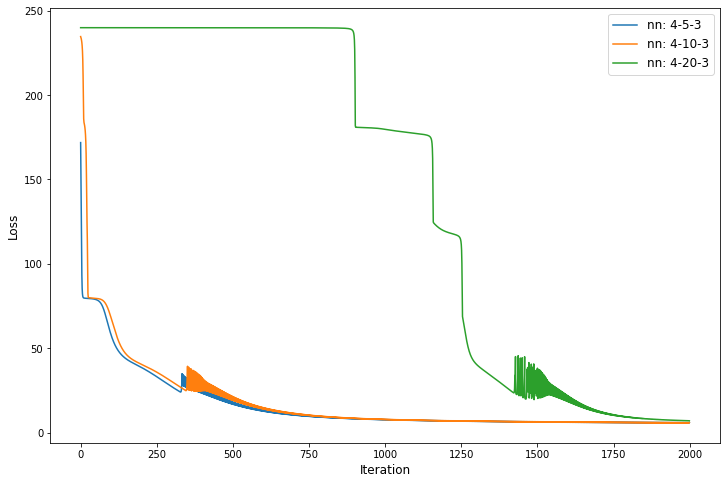

In [ ]:
num_hidden_nodes = [5, 10, 20]
loss_plot = {5: [], 10: [], 20: []}
weights1 = {5: None, 10: None, 20: None}
weights2 = {5: None, 10: None, 20: None}
num_iters = 2000

plt.figure(figsize=(12,8))
for hidden_nodes in num_hidden_nodes:
    weights1[hidden_nodes], weights2[hidden_nodes] = create_train_model(hidden_nodes, num_iters)
    plt.plot(range(num_iters), loss_plot[hidden_nodes], label="nn: 4-%d-3" % hidden_nodes)
    
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)

In [ ]:
# Evaluate models on the test set
X = tf.placeholder(shape=(30, 4), dtype=tf.float64, name='X')
y = tf.placeholder(shape=(30, 3), dtype=tf.float64, name='y')

for hidden_nodes in num_hidden_nodes:

    # Forward propagation
    W1 = tf.Variable(weights1[hidden_nodes])
    W2 = tf.Variable(weights2[hidden_nodes])
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Calculate the predicted outputs
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        y_est_np = sess.run(y_est, feed_dict={X: Xtest, y: ytest})

    # Calculate the prediction accuracy
    correct = [estimate.argmax(axis=0) == target.argmax(axis=0) 
               for estimate, target in zip(y_est_np, ytest.values)]
    accuracy = 100 * sum(correct) / len(correct)
    print('Network architecture 4-%d-3, accuracy: %.2f%%' % (hidden_nodes, accuracy))

Network architecture 4-5-3, accuracy: 96.67%
Network architecture 4-10-3, accuracy: 96.67%
Network architecture 4-20-3, accuracy: 100.00%
